## Simulation: Nontransitive Dice
This is a classic set of three nontransitive dice often shown in statistics courses.
Let A beat B (slightly more than 50% of the time), B beat C, and C beat A.

**Default faces used here (you can change them):**
- A: [3, 3, 3, 3, 3, 3]
- B: [4, 4, 4, 4, 0, 0]
- C: [5, 5, 5, 1, 1, 1]
- D: [6, 6, 2, 2, 2, 2]

**Task:**
1. Simulate many head-to-head rolls for each pair.
2. Track cumulative win percentages over time.
3. Visualize the trajectories.

In [2]:
from collections import namedtuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dice = namedtuple('Dice', ['name', 'faces'])
A = Dice('A', np.array([3, 3, 3, 3, 3, 3]))
B = Dice('B', np.array([4, 4, 4, 4, 0, 0]))
C = Dice('C', np.array([5, 5, 5, 1, 1, 1]))
D = Dice('D', np.array([6, 6, 2, 2, 2, 2]))

def simulate_pair(d1, d2, n=10_000):
    """Simulate n matchups of two dice; return wins for d1, d2, and draws."""
    r1 = np.random.choice(d1.faces, size=n)
    r2 = np.random.choice(d2.faces, size=n)
    wins1 = (r1 > r2)
    wins2 = (r2 > r1)
    return wins1, wins2

def cumulative_win_rate(wins1):
    # cumulative mean of a boolean array
    return np.cumsum(wins1) / (np.arange(len(wins1)) + 1)

# Simulate pairs
wins_AB, wins_BA = simulate_pair(A, B, n=5_000)
wins_AC, wins_CA = simulate_pair(A, C, n=5_000)
wins_AD, wins_DA = simulate_pair(A, D, n=5_000)
wins_BC, wins_CB = simulate_pair(B, C, n=5_000)
wins_BD, wins_DB = simulate_pair(B, D, n=5_000)
wins_CD, wins_DC = simulate_pair(C, D, n=5_000)

In [3]:
# Create a table showing win rates for all dice combinations
win_rates = {
    'A vs B': wins_AB.mean(),
    'A vs C': wins_AC.mean(),
    'A vs D': wins_AD.mean(),
    'B vs A': wins_BA.mean(),
    'B vs C': wins_BC.mean(),
    'B vs D': wins_BD.mean(),
    'C vs A': wins_CA.mean(),
    'C vs B': wins_CB.mean(),
    'C vs D': wins_CD.mean(),
    'D vs A': wins_DA.mean(),
    'D vs B': wins_DB.mean(),
    'D vs C': wins_DC.mean()
}

# Convert to DataFrame for better display
df = pd.DataFrame(list(win_rates.items()), columns=['Matchup', 'Win Rate'])
print(df)

   Matchup  Win Rate
0   A vs B    0.3346
1   A vs C    0.5020
2   A vs D    0.6590
3   B vs A    0.6654
4   B vs C    0.3310
5   B vs D    0.4556
6   C vs A    0.4980
7   C vs B    0.6690
8   C vs D    0.3242
9   D vs A    0.3410
10  D vs B    0.5444
11  D vs C    0.6758


### Visualize Cumulative Win Rates

In [4]:
def plot_cumulative(wins, labels, title, ax=None):
    """Plot cumulative win rates for multiple dice comparisons with colored lines."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    else:
        fig = ax.figure
    
    for i, (win_array, label) in enumerate(zip(wins, labels)):
        rates = cumulative_win_rate(win_array)
        if label == "A":
            color = 'red'
        elif label =='B':
            color = 'blue'
        elif label == 'C':
            color = 'green'
        elif label == 'D':
            color = 'orange'
        else:
            color = 'purple'
        ax.plot(rates, label=f'vs {label}', color=color, linewidth=2)
    
    ax.set_xlabel('Trials')
    ax.set_ylabel('Cumulative win rate')
    ax.set_title(title)
    ax.set_ylim(.2, .8)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    return fig

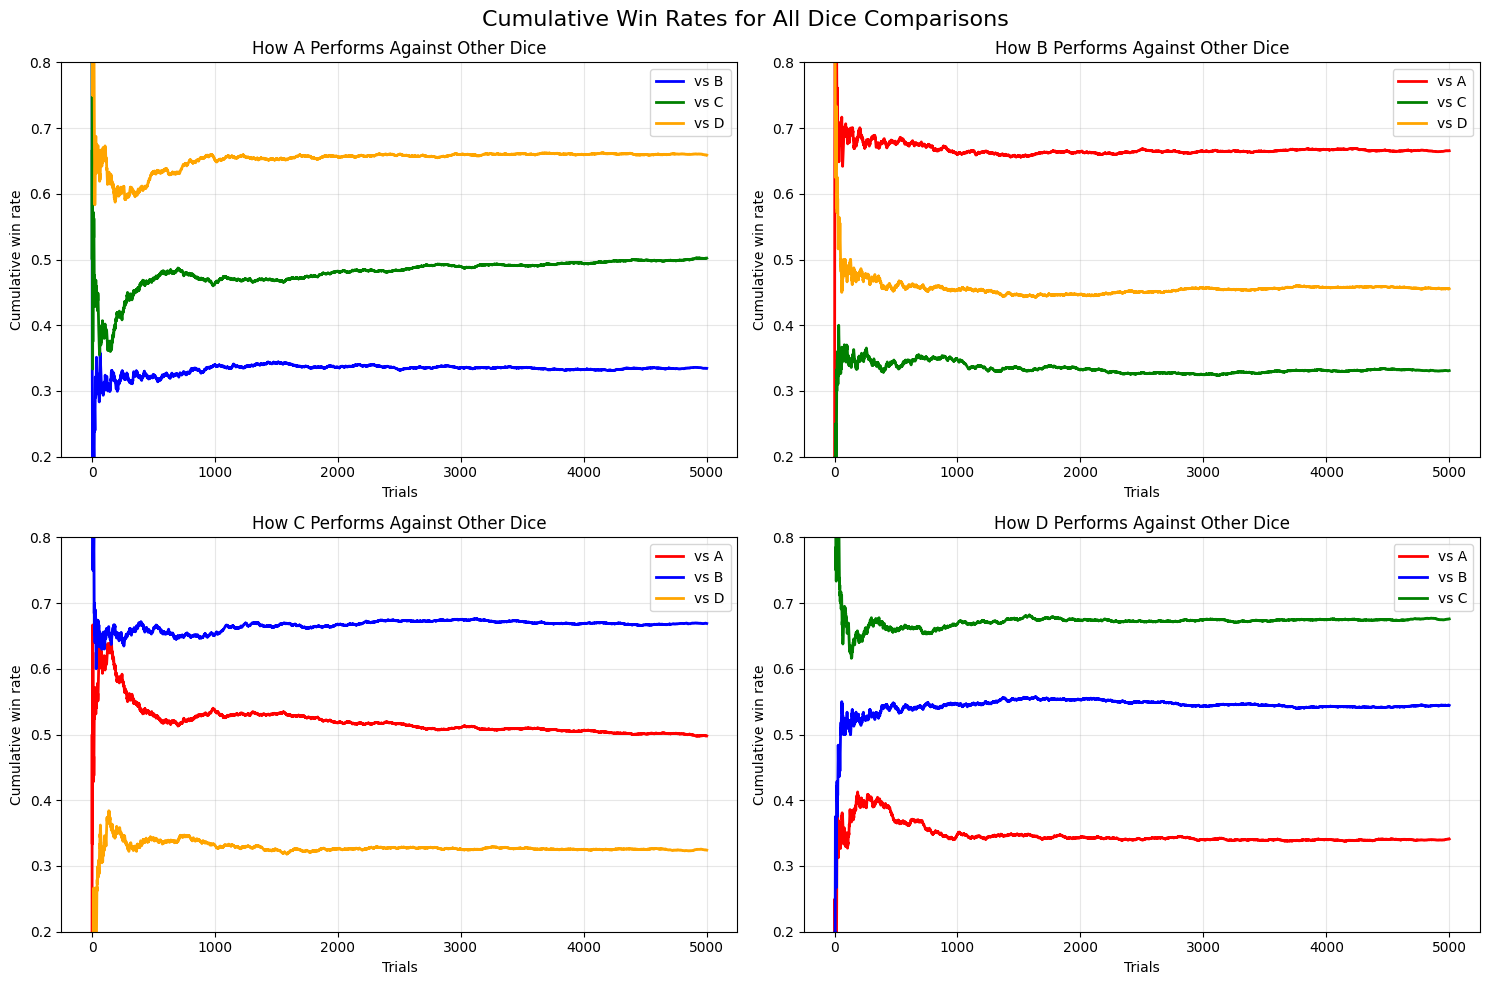

In [5]:
# Create a 2x2 subplot to show all four dice comparisons
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Cumulative Win Rates for All Dice Comparisons', fontsize=16)

# Plot how A performs against others
wins_A_vs_others = [wins_AB, wins_AC, wins_AD]
labels_others = ['B', 'C', 'D']
plot_cumulative(wins_A_vs_others, labels_others, 'How A Performs Against Other Dice', ax=axes[0, 0])

# Plot how B performs against others
wins_B_vs_others = [wins_BA, wins_BC, wins_BD]
labels_for_B = ['A', 'C', 'D']
plot_cumulative(wins_B_vs_others, labels_for_B, 'How B Performs Against Other Dice', ax=axes[0, 1])

# Plot how C performs against others
wins_C_vs_others = [wins_CA, wins_CB, wins_CD]
labels_for_C = ['A', 'B', 'D']
plot_cumulative(wins_C_vs_others, labels_for_C, 'How C Performs Against Other Dice', ax=axes[1, 0])

# Plot how D performs against others
wins_D_vs_others = [wins_DA, wins_DB, wins_DC]
labels_for_D = ['A', 'B', 'C']
plot_cumulative(wins_D_vs_others, labels_for_D, 'How D Performs Against Other Dice', ax=axes[1, 1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Explore Further
- Change the faces of the dice and re-run.
- Increase/decrease the number of trials.